# Statistics - Descriptive

In [1]:
import warnings
from IPython.display import display, HTML

In [2]:
### HTML display Ï°∞Ï†ï
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning Ï†úÍ±∞
warnings.filterwarnings('ignore')

## Package Load

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

## Data

### (1) Univariable data

In [4]:
fish_data = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

### (2) Multivariable data
- Ïó¥Ïù¥ Î≥ÄÏàòÏùò ÏùòÎØ∏Î•º Í∞ÄÏßÄÏóê Ìï¥Ïïº Î∂ÑÏÑùÏù¥ Ïö©Ïù¥
- Ìñâ ÌïòÎÇòÏóê 1Í∞úÏùò Í≤∞Í≥ºÍ∞Ä ÏûàÎèÑÎ°ù Ï†ïÎ¶¨

In [5]:
state = pd.read_csv("./data/state.csv")
state.head()

State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA

In [6]:
shoes = pd.read_csv("./data/3-2-2-shoes.csv")
shoes

store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9

In [7]:
fish_multi = pd.read_csv("./data/3-2-1-fish_multi.csv")
fish_multi

species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10

In [8]:
### Grouping
group = fish_multi.groupby("species")
group.mean()

length
species        
A             3
B             8

In [9]:
group.std(ddof=1)

length
species        
A           1.0
B           2.0

In [10]:
group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [11]:
### Contingency table
cross = pd.pivot_table(
    data = shoes,
    values = "sales",
    aggfunc = "sum",
    index = "store",
    columns = "color")
cross

color  blue  red
store           
osaka    13    9
tokyo    10   15

In [12]:
lc_loans = pd.read_csv("./data/lc_loans.csv")

crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)
crosstab

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961

In [13]:
df = crosstab.copy().loc['A':'G', :]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
df

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187

## Numerical Descriptives

### (1) Measures of central location

#### Length

In [14]:
len(fish_data)

10

#### Sum

In [15]:
fish_data.sum()

40

In [16]:
np.sum(fish_data)

40

#### Mean
- Í≥ÑÏÇ∞ÏùÑ ÌÜµÌï¥ Íµ¨ÌïòÎäî ÎåÄÌëúÍ∞í
- Arithmatic
    - ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÉùÍ∞ÅÌïòÎäî ÌèâÍ∑†
    - ÎçßÏÖàÏùò ÌèâÍ∑†
- Geometric
    - Í≥±ÏÖàÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî Í∞íÎì§Ïùò ÌèâÍ∑†
    - Î≥ÄÌôîÏú®Ïùò ÌèâÍ∑†
- Harmonic
    - Ïó≠ÏàòÎì§Ïùò ÌèâÍ∑†ÏùÑ Íµ¨ÌïòÍ≥†, Îã§Ïãú Ïó≠ÏàòÎ•º Ï∑®Ìï®
    - Îã§Î•∏ Ï∞®ÏõêÏóêÏÑú ÌèâÍ∑†ÏùÑ Íµ¨Ìï† Îïå ÏÇ¨Ïö© (ÌèâÍ∑† ÏÜçÎèÑÎ•º Íµ¨Ìï† Îïå, ÏãúÍ∞ÑÏùò Ï∞®ÏõêÏóêÏÑú ÌèâÍ∑†ÏùÑ Íµ¨Ìï®)
- Trim
    - ÏùºÏ†ï ÎπÑÏú®ÎßåÌÅº Í∑πÎã®Í∞íÏùÑ Ï†àÏÇ¨ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ∞Ïà†ÌèâÍ∑†
    - Ïù¥ÏÉÅÏπòÏùò ÏòÅÌñ•ÏùÑ Ï§ÑÏùº Ïàò ÏûàÏùå
- Quadratic
    - Í∞Å Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ≥±ÌïòÏó¨ ÏÇ∞Ïà†ÌèâÍ∑†ÏùÑ ÎÇ¥Í≥†, Ï†úÍ≥±Í∑ºÏùÑ Ï∑®Ìï®
    - ÎπÑÏ†ïÏÉÅ Í¥ÄÏ∏°ÏπòÏùò ÏòÅÌñ•ÏùÑ Î∂ÄÍ∞ÅÏãúÌÇ¨ Îïå ÏÇ¨Ïö©
- Weighted
    - Îç∞Ïù¥ÌÑ∞Ïùò Í∞ÄÏ§ëÏπòÎ•º Í≥†Î†§Ìïú ÌèâÍ∑†

In [17]:
### mean
fish_data.mean()

4.0

In [18]:
state['Population'].mean()

6162876.3

In [19]:
# Ïù¥ÏÉÅÏπòÏùò ÏòÅÌñ•
fish_data_2 = np.array([2, 3, 3, 4, 4, 4, 4, 5, 5, 100])
print(np.mean(fish_data_2), np.median(fish_data_2))

13.4 4.0


In [20]:
### geometric mean
stats.gmean([1.0, 0.00001, 10000000000.])

46.415888336127786

In [21]:
### harmonic mean
stats.hmean([1.0, 0.00001, 10000000000.])

2.9999700002999943e-05

In [22]:
### trim mean
stats.trim_mean(fish_data, 0.2) # trim ÎπÑÏú®ÎèÑ ÌååÎùºÎØ∏ÌÑ∞Î°ú Îì§Ïñ¥Í∞ê

4.0

In [23]:
stats.trim_mean(state['Population'], 0.1)

4783697.125

In [24]:
### weighted mean
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

#### Quantiles
- Îç∞Ïù¥ÌÑ∞Ïùò ÏúÑÏπò(Rank)Î°ú Íµ¨ÌïòÎäî ÎåÄÌëúÍ∞íÏúºÎ°ú, Ïù¥ÏÉÅÏπòÏóê Îçú ÎØºÍ∞êÌïú ÌäπÏÑ±Ïù¥ ÏûàÏùå
- Mode, Median, Maximum, Minimum, Quartile, Percentile

In [25]:
### mode
stats.mode(fish_data)

ModeResult(mode=array([4]), count=array([4]))

In [26]:
stats.mode(state['Murder.Rate'])

ModeResult(mode=array([1.6]), count=array([3]))

In [27]:
state['Murder.Rate'].mode()

0    1.6
1    2.0
2    5.7
dtype: float64

In [28]:
### median
np.median(fish_data)

4.0

In [29]:
state['Population'].median()

4436369.5

In [30]:
### maximum, minimum
np.max(fish_data), np.min(fish_data)

(6, 2)

In [31]:
fish_data.max(), fish_data.min()

(6, 2)

In [32]:
### Ïó¨Îü¨ Quantile Í≥ÑÏÇ∞
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [33]:
### Quartile, Percentile
state['Population'].quantile(0.25), state['Population'].quantile(0.75)

(1833004.25, 6680312.25)

In [34]:
### Percentile
fish_data_3 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(np.percentile(fish_data_3, 25), np.percentile(fish_data_3, 75))

3.0 7.0


### (2) Measures of Variability

#### Absolute Variability
- Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Ï†ïÌï¥ÏßÄÎäî Î≥ÄÎèôÏÑ± Í∞í
- Variance, Standard Deviation, Mean (Absolute) Deviation, MAD
    - Í≥ÑÏÇ∞ÏùÑ ÌÜµÌï¥ Íµ¨Ìï¥ÏßÄÎäî Î≥ÄÎèôÏÑ±
    - ÌèâÍ∑†Í≥º Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïù¥ (Ìé∏Ï∞®)Î•º Í≥†Î†§Ìïú Í∞í
- Range, Interquartile Range, Quartile Deviation
    - QuantileÏùÑ Í≥†Î†§Ìïú Î≥ÄÎèôÏÑ±

In [35]:
### variance
# np.var(fish_data, ddof=0) # ÎèôÏùº
fish_data.var()

1.2

In [36]:
### Unbiased variance
# N-1Î°ú ÎÇòÎàî
np.var(fish_data, ddof=1) 

1.3333333333333333

In [37]:
### Std. deviation
# np.std(fish_data, ddof=0)
np.std(fish_data, ddof=1)

1.1547005383792515

In [38]:
state['Population'].std()

6848235.347401144

In [39]:
### Standardization
# ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1
print(np.mean((fish_data - fish_data.mean())/np.std(fish_data, ddof=0)))
print(np.std((fish_data - fish_data.mean())/np.std(fish_data, ddof=0)))

2.2204460492503132e-17
1.0


In [40]:
### Mean (Absolute) Deviation
# Ìé∏Ï∞® Ï†àÎåÄÍ∞íÏùò ÌèâÍ∑†
def mean_deviation(data, axis=None):
    return np.mean(np.abs(data - np.mean(data, axis)), axis)

print(mean_deviation(state['Population']))
print(mean_deviation(fish_data))

4450933.356000001
0.8


In [41]:
### Range
# Max - Min
fish_data.max() - fish_data.min()

4

In [42]:
### IQR: Interquartile Range
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [43]:
### Quantile Deviation
# IQR/2
(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))/2

2423654.0

In [44]:
from statsmodels import robust

In [45]:
### MAD (Mean Absolute Deviation from the median)
# Ìé∏Ï∞® Ï†àÎåìÍ∞íÏùò Ï§ëÍ∞ÑÍ∞íÏúºÎ°ú, Ïó¨Í∏∞ÏóêÏÑú Ìé∏Ï∞®Îäî Ï§ëÍ∞ÑÍ∞íÍ≥º Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Ïù¥Í∞í
robust.scale.mad(state['Population'])

3849876.1459979336

#### Relational Variability
- Îç∞Ïù¥ÌÑ∞Ïùò scaleÏùÑ Í≥†Î†§ÌïòÏó¨, ÏÉÅÎåÄÏ†ÅÏù∏ Î≥ÄÎèôÏÑ± Ï∏°Ï†ï
- Coefficient of Variance
    - SD/mean
    - ÌèâÍ∑† ÎåÄÎπÑ ÌëúÏ§ÄÌé∏Ï∞®Ïùò ÏÉÅÎåÄÏ†Å ÌÅ¨Í∏∞
- Coefficient of Quartile Deviation
    - ÏÇ¨Î∂ÑÌé∏Ï∞® (Quartile Deviation)ÏùÑ medianÏúºÎ°ú ÎÇòÎàà Í∞í
- Coefficient of Mean Deviation
    - ÌèâÍ∑†Ìé∏Ï∞® (Mean Deviation)ÏùÑ ÌèâÍ∑†ÏúºÎ°ú ÎÇòÎàà Í∞í

In [46]:
### CV
np.std(fish_data, ddof=1)/np.mean(fish_data)

0.28867513459481287

In [47]:
# max variation along rows of A; 
# rows: axis=0, cols: axis=1
stats.variation(fish_data, axis=0, ddof=1) # Î™®ÏßëÎã®Ïùò Î≥ÄÎèôÍ≥ÑÏàò

0.28867513459481287

In [48]:
### CQD
# (IQR/2)/median
(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))/2/state['Population'].median()

0.5463147287438523

In [49]:
### CMD
# MD/mean
mean_deviation(state['Population'])/state['Population'].mean()

0.7222168901881092

### (3) Measures of Relationship
- Îëê Î≥ÄÏàòÏùò ÏÑ†ÌòïÍ¥ÄÍ≥Ñ Ï∏°Ï†ï
- Covariance, Correlation Coefficient

In [50]:
### Covariance
cov_data = pd.read_csv("./data/3-2-3-cov.csv")
cov_data

x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49

In [51]:
x = cov_data["x"]
y = cov_data["y"]

np.cov(x, y, ddof=0)

array([[ 3.2816,  6.906 ],
       [ 6.906 , 25.21  ]])

In [52]:
np.cov(x, y, ddof=1)

array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

In [53]:
### Correlation
# NÏù¥Îì† N-1Ïù¥Îì† ÎèôÏùºÌïú Í∞íÏù¥ Îê®
cov_data.corr()

x         y
x  1.000000  0.759272
y  0.759272  1.000000

In [54]:
sp500_sym = pd.read_csv("./data/sp500_sectors.csv")
sp500_px = pd.read_csv("./data/sp500_data.csv.gz", index_col=0)

In [55]:
# Determine telecommunications symbols
telecom_symbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecom_symbols]
telecom.corr()

T       CTL       FTR        VZ      LVLT
T     1.000000  0.474683  0.327767  0.677612  0.278626
CTL   0.474683  1.000000  0.419757  0.416604  0.286665
FTR   0.327767  0.419757  1.000000  0.287386  0.260068
VZ    0.677612  0.416604  0.287386  1.000000  0.242199
LVLT  0.278626  0.286665  0.260068  0.242199  1.000000

### (4) Measure of distribution shape
- Skewness: Îç∞Ïù¥ÌÑ∞Ïùò ÏπòÏö∞Ïπ® Ï†ïÎèÑÎ°ú, ÏñëÏàòÏù∏ Í≤ΩÏö∞ Ïò§Î•∏Ï™ΩÏóê Í∏¥ Íº¨Î¶¨ (ÏùåÏàòÏù∏ Í≤ΩÏö∞ Í∑∏ Î∞òÎåÄ)
- Kurtosis: Îç∞Ïù¥ÌÑ∞Ïùò ÏßëÏ§ë(Îæ∞Ï°±Ìï®) Ï†ïÎèÑÎ°ú, Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùÑÏàòÎ°ù ÎÜíÏùå
    - Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò Ï≤®ÎèÑÎ•º 0ÏúºÎ°ú Î≥¥Îäî Í≤ΩÏö∞ (Fisher), 3ÏúºÎ°ú Î≥¥Îäî Í≤ΩÏö∞ (Pearson)Í∞Ä ÏûàÏùå
    - Fisher method Îäî Pearson method - 3ÏúºÎ°ú Í≥ÑÏÇ∞Ìï®
    - DefaultÎäî Fisher

In [56]:
### Skewness
# DataFrame/Series ÌòïÌÉúÎ°ú Î≥ÄÍ≤ΩÌïòÏó¨ Ï∂úÎ†•
state['Population'].skew()

2.6426346412748765

In [57]:
stats.skew(state['Population'], bias=False) # correction = True

2.642634641274876

In [58]:
### Kurtosis
state['Population'].kurtosis()

8.722114728161502

In [59]:
stats.kurtosis(state['Population'], bias=False) # correction = True, fisher = True

8.722114728161502

In [60]:
stats.kurtosis(state['Population'], bias=False, fisher=False)

11.722114728161502

## Probability

### (1) Permutation & Combination

In [61]:
import itertools

In [62]:
tmp_list = list(range(10))
perm = len(list(itertools.permutations(tmp_list, 3)))
comb = len(list(itertools.combinations(tmp_list, 3)))
print(perm, comb)

720 120


In [63]:
### Ï§ëÎ≥µÏàúÏó¥Í≥º Ï§ëÎ≥µÏ°∞Ìï©
perm_with_replacement = len(list(itertools.product(tmp_list, repeat=3)))
comb_with_replacement = len(list(itertools.combinations_with_replacement(tmp_list, 3)))
print(perm_with_replacement, comb_with_replacement)

1000 220


### (2) Bayes Theorem

- Conditional Probability
    - ÌëúÎ≥∏Í≥µÍ∞ÑÏùò Î∂ÄÎ∂ÑÏßëÌï© ÎÇ¥ÏóêÏÑú ÏùºÏñ¥ÎÇ† ÌôïÎ•†
    - ÌëúÎ≥∏Í≥µÍ∞Ñ ÎÇ¥ ÏûÑÏùòÏùò Îëê ÏÇ¨Í±¥ A, BÏóê ÎåÄÌïòÏó¨, BÍ∞Ä ÏùºÏñ¥ÎÇ¨ÏùÑ Îïå AÍ∞Ä ÏùºÏñ¥ÎÇ† ÌôïÎ•†
- Formula
    - P(A(k)|B) = P(A(k))*P(B|A(k))/sum(P(A(i))*P(B|A(i))), i=1~n
    - ÏÇ¨ÌõÑÌôïÎ•† = ÏÇ¨Ï†ÑÌôïÎ•†*Likelihood/sum(ÏÇ¨Ï†ÑÌôïÎ•†*Likelihood)
    - Ï°∞Í±¥Î∂Ä ÌôïÎ•†ÏùÑ Ïó≠ÏúºÎ°ú Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏùå

In [64]:
table = pd.DataFrame([[18, 5], [12, 3]], index=['ÎÇ®Ïûê', 'Ïó¨Ïûê'], columns=['ÏïàÍ≤ΩO', 'ÏïàÍ≤ΩX'])
table

ÏïàÍ≤ΩO  ÏïàÍ≤ΩX
ÎÇ®Ïûê   18    5
Ïó¨Ïûê   12    3

In [65]:
# Ï°∞Í±¥Î∂Ä ÌôïÎ•†: Ïó¨ÏûêÏùº Îïå, ÏïàÍ≤ΩÏùÑ ÏçºÏùÑ ÌôïÎ•†?
# A = Ïó¨ÏûêÏù∏ ÏÇ¨Í±¥
# B = ÏïàÍ≤ΩÏùÑ Ïì¥ ÏÇ¨Í±¥
A = (12 + 3)/(18 + 5 + 12 + 3)
A_B = 12/(18 + 5 + 12 + 3)
print("P(ÏïàÍ≤ΩO|Ïó¨Ïûê) = ", round(A_B/A, 4))

P(ÏïàÍ≤ΩO|Ïó¨Ïûê) =  0.8


In [66]:
# Bayes Theorem
# BÍ∞Ä ÏùºÏñ¥ÎÇ¨ÏùÑ Îïå, AiÍ∞Ä ÏùºÏñ¥ÎÇ† ÌôïÎ•†?
a1, a2 = 0.7, 0.3 # P(A1), P(A2)
b_a1, b_a2 = 0.2, 0.9 # P(B|A1), P(B|A2)
b = a1*b_a1 + a2*b_a2 # P(B)

table = pd.DataFrame({'ÏÇ¨Í±¥': ['A1', 'A2'],
                      'ÏÇ¨Ï†ÑÌôïÎ•†_P(Ai)': [a1, a2],
                      'Ï°∞Í±¥Î∂ÄÌôïÎ•†_P(B|Ai)': [b_a1, b_a2],
                      'Í≤∞Ìï©ÌôïÎ•†_P(Ai*B)': [a1*b_a1, a2*b_a2],
                      'ÏÇ¨ÌõÑÌôïÎ•†_P(Ai|B)': [a1*b_a1/b, a2*b_a2/b]})
table

ÏÇ¨Í±¥  ÏÇ¨Ï†ÑÌôïÎ•†_P(Ai)  Ï°∞Í±¥Î∂ÄÌôïÎ•†_P(B|Ai)  Í≤∞Ìï©ÌôïÎ•†_P(Ai*B)  ÏÇ¨ÌõÑÌôïÎ•†_P(Ai|B)
0  A1         0.7            0.2          0.14      0.341463
1  A2         0.3            0.9          0.27      0.658537

In [67]:
a1, a2, a3 = 0.2, 0.35, 0.45 # P(A1), P(A2), P(A3)
b_a1, b_a2, b_a3 = 0.02, 0.04, 0.03 # P(B|A1), P(B|A2), P(B|A3)
b = a1*b_a1 + a2*b_a2 + a3*b_a3 # P(B)

table = pd.DataFrame({'ÏÇ¨Í±¥': ['A1', 'A2', 'A3'],
                      'ÏÇ¨Ï†ÑÌôïÎ•†_P(Ai)': [a1, a2, a3],
                      'Ï°∞Í±¥Î∂ÄÌôïÎ•†_P(B|Ai)': [b_a1, b_a2, b_a3],
                      'Í≤∞Ìï©ÌôïÎ•†_P(Ai*B)': [a1*b_a1, a2*b_a2, a3*b_a3],
                      'ÏÇ¨ÌõÑÌôïÎ•†_P(Ai|B)': [a1*b_a1/b, a2*b_a2/b, a3*b_a3/b]})
table

ÏÇ¨Í±¥  ÏÇ¨Ï†ÑÌôïÎ•†_P(Ai)  Ï°∞Í±¥Î∂ÄÌôïÎ•†_P(B|Ai)  Í≤∞Ìï©ÌôïÎ•†_P(Ai*B)  ÏÇ¨ÌõÑÌôïÎ•†_P(Ai|B)
0  A1        0.20           0.02        0.0040      0.126984
1  A2        0.35           0.04        0.0140      0.444444
2  A3        0.45           0.03        0.0135      0.428571

## Discrete Probability Distribution

### (1) Binomial
- Î≤†Î•¥ÎàÑÏù¥ ÏãúÌñâ: 2 Ï¢ÖÎ•òÏùò Í≤∞Í≥º Ï§ë ÌïòÎÇòÎßå Î∞úÏÉùÏãúÌÇ§Îäî ÏãúÌñâ (ÏÑ±Í≥µ/Ïã§Ìå®)
- ÏÑ±Í≥µÌôïÎ•† p, N ÌöåÏùò ÎèÖÎ¶Ω Î≤†Î•¥ÎàÑÏù¥ ÏãúÌñâÏùÑ ÌñàÏùÑ Îïå, ÏÑ±Í≥µÌïú ÌöüÏàò XÏùò ÌôïÎ•†Î∂ÑÌè¨

In [68]:
# PMF
stats.binom.pmf(k=1, n=2, p=0.5) # ÏÑ±Í≥µÌöüÏàò, ÏãúÌñâÌöüÏàò, ÏÑ±Í≥µÌôïÎ•†

0.5000000000000002

In [69]:
# CDF
stats.binom.cdf(k=2, n=5, p=0.1)

0.99144

In [70]:
np.random.seed(1)
stats.binom.rvs(n=10, p=0.2, size=5) # ÏãúÌñâÌöüÏàò n, ÏÑ±Í≥µÌôïÎ•† p, 5Î≤à Î∞òÎ≥µ sampling

array([2, 3, 0, 1, 1])

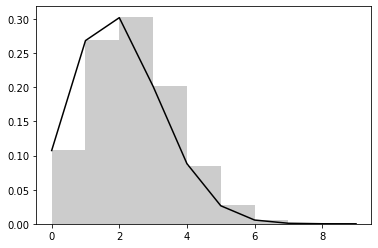

In [71]:
binomial = stats.binom(n=10, p=0.2)

np.random.seed(1)
rvs_binomial = binomial.rvs(size=10000)

m = np.arange(0, 10, 1)
sns.distplot(rvs_binomial, bins=m, kde=False, norm_hist=True, color='gray')
plt.plot(m, binomial.pmf(k=m), color='black')
plt.show()

### (2) Multinomial
- Ïù¥Ìï≠Î∂ÑÌè¨Ïùò ÌôïÏû•ÌòïÏúºÎ°ú, ÌôïÎ•†Î≥ÄÏàòÏùò Î≤îÏ£ºÍ∞Ä 3Í∞ÄÏßÄ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ 

In [72]:
# n: Number of trials
# p (array-like): Probability of a trial falling into each category; should sum to 1
rv = stats.multinomial(8, [0.3, 0.2, 0.5])
rv.pmf([1, 3, 4])

0.04200000000000007

In [73]:
stats.multinomial.pmf([[3, 4], [3, 5]], n=[7, 8], p=[.3, .7])

array([0.2268945 , 0.25412184])

In [74]:
stats.multinomial.cov([4, 5], [[.3, .7], [.4, .6]])

array([[[ 0.84, -0.84],
        [-0.84,  0.84]],

       [[ 1.2 , -1.2 ],
        [-1.2 ,  1.2 ]]])

### (3) Poisson
- Îã®ÏúÑ ÏãúÍ∞Ñ, Î©¥Ï†Å, Í≥µÍ∞ÑÏóêÏÑúÏùò Ïπ¥Ïö¥Ìä∏ Îç∞Ïù¥ÌÑ∞ (0 Ïù¥ÏÉÅÏùò Ï†ïÏàò)Ïùò ÌôïÎ•†Î∂ÑÌè¨
- p -> 0, N -> InfÏùò Ï°∞Í±¥ÏóêÏÑú Ïù¥Ìï≠Î∂ÑÌè¨ Np=Œª
- ÌèâÍ∑† Œª, Î∂ÑÏÇ∞ Œª
- Œª >=5 ÏùºÎïå Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∑ºÏÇ¨

In [75]:
stats.poisson.pmf(k=2, mu=5)

0.08422433748856832

In [76]:
stats.poisson.cdf(k=2, mu=5)

0.12465201948308109

In [77]:
# Œª=2Ïù∏ Possion
np.random.seed(1)
stats.poisson.rvs(mu=2, size=5)

array([2, 1, 0, 1, 2])

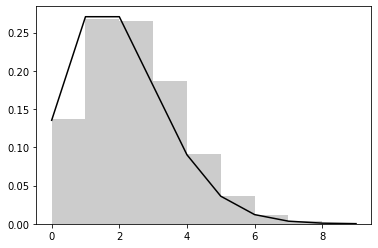

In [78]:
poisson = stats.poisson(mu=2)

np.random.seed(1)
rvs_poisson = poisson.rvs(size = 10000)
pmf_poisson = poisson.pmf(k=m)

sns.distplot(rvs_poisson, bins=m, kde=False, norm_hist=True, color='gray')
plt.plot(m, pmf_poisson, color='black')

Mean: N*p = 2.0


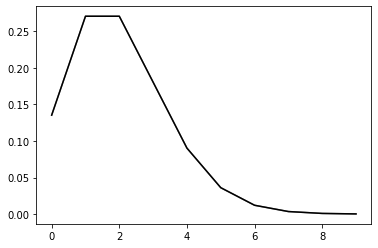

In [79]:
# NÏù¥ ÌÅ¨Í≥† pÍ∞Ä ÏûëÏùÑ ÎïåÏùò Ïù¥Ìï≠Î∂ÑÌè¨
N = 100000000
p = 0.00000002
print("Mean: N*p =", N*p)
binomial_2 = stats.binom(n=N, p=p)

pmf_binomial_2 = binomial_2.pmf(k=m)

sns.lineplot(x=m, y=pmf_poisson, color='gray')
sns.lineplot(x=m, y=pmf_binomial_2, color='black', linestyle='dotted')
plt.show()

### (5) Negative Binomial
- Ïπ¥Ïö¥Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÌôïÎ•†Î∂ÑÌè¨
- ÏÑ±Í≥µ ÌöüÏàò kÌöåÍ∞Ä Îê† ÎïåÍπåÏßÄÏùò ÏãúÌñâÌöüÏàò(ÎòêÎäî Ïã§Ìå®ÌöüÏàò)Î•º ÌôïÎ•†Î≥ÄÏàòÎ°ú Îë†
- ÌèâÍ∑† k/p, Î∂ÑÏÇ∞ k(1-p)/p**2
- PoissionÎ≥¥Îã§ Î∂ÑÏÇ∞Ïù¥ ÌÅ∞ Í≤ΩÏö∞

In [80]:
n, p = 5, 0.5 # 0.5 ÌôïÎ•†Ïùò ÏãúÌñâÏùÑ 5Ìöå ÏÑ±Í≥µÌï† ÎïåÍπåÏùò ÏãúÌñâÌöüÏàòÍ∞Ä ÌôïÎ•†Î≥ÄÏàò
mean, var, skew, kurt = stats.nbinom.stats(n, p, moments='mvsk')

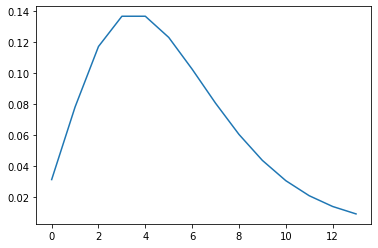

In [81]:
x = np.arange(stats.nbinom.ppf(0.01, n, p), stats.nbinom.ppf(0.99, n, p))
sns.lineplot(x=x, y=stats.nbinom(n, p).pmf(x))
plt.show()

### (6) Geometric
- 1Ìöå ÏÑ±Í≥µÍπåÏßÄÏùò ÏãúÌñâÌöüÏàòÍ∞Ä ÌôïÎ•†Î≥ÄÏàò (k=1Ïù∏ ÏùåÏù¥Ìï≠Î∂ÑÌè¨)
- ÌèâÍ∑† 1/p, Î∂ÑÏÇ∞ (1-p)/p**2
- Î¨¥Í∏∞ÏñµÏÑ±: Ïã§Ìå® ÌöüÏàòÍ∞Ä ÏïûÏúºÎ°ú ÏÑ±Í≥µÌï† Í∞ÄÎä•ÏÑ±Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÏùå

In [82]:
p = 0.5
mean, var, skew, kurt = stats.geom.stats(p, moments='mvsk')

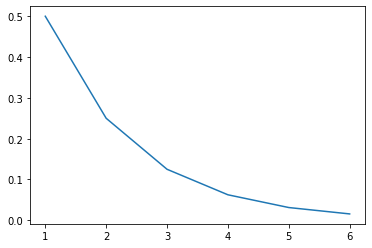

In [83]:
x = np.arange(stats.geom.ppf(0.01, p), stats.geom.ppf(0.99, p))
sns.lineplot(x=x, y=stats.geom(p).pmf(x))
plt.show()

### (7) Hypergeometric
- ÎπÑÎ≥µÏõê Ï∂îÏ∂ú(ÎèÖÎ¶ΩÏù¥ ÏïÑÎãå) ÏÇ¨Í±¥ÏóêÏÑúÏùò Ïù¥Ìï≠ÌôïÎ•†Î∂ÑÌè¨Î°ú, ÏãúÌñâ ÎïåÎßàÎã§ ÌôïÎ•†Ïù¥ Îã¨ÎùºÏßê
- Î™®ÏßëÎã® Í∞úÏàò N, Î™®ÏßëÎã®ÏóêÏÑú ÏÇ¨Í±¥Ïù¥ ÏùºÏñ¥ÎÇú ÌöüÏàò D, ÏÉòÌîå Í∞úÏàò n
- p = D/N
- X: ÌëúÎ≥∏ÏóêÏÑú ÏÇ¨Í±¥Ïùò Í∞úÏàòÏóê Ìï¥ÎãπÌïòÎäî Í∞úÏàò
- ÌèâÍ∑† np, ÌëúÏ§ÄÌé∏Ï∞® np(1-p)((N-n)/(N-1)) 

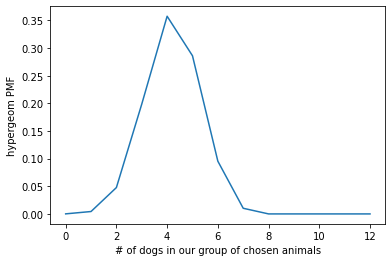

In [84]:
[N, D, n] = [20, 7, 12]

rv = stats.hypergeom(N, D, n)
x = np.arange(0, n + 1)

pmf_dogs = rv.pmf(x)

fig = plt.figure()

sns.lineplot(x=x, y=pmf_dogs)
plt.xlabel('# of dogs in our group of chosen animals')
plt.ylabel('hypergeom PMF')
plt.show()

## Continuous Probability Distribution

### (1) Uniform
- Î∂ÑÌè¨Í∞Ä ÌäπÏ†ï Î≤îÏúÑ(Íµ¨Í∞Ñ a-b) ÎÇ¥ÏóêÏÑú Í∑†Îì±ÌïòÍ≤å ÎÇòÌÉÄÎÇòÎäî Î∂ÑÌè¨
- ÌèâÍ∑† (a +b)/2, Î∂ÑÏÇ∞ (b-a)**2/12

In [85]:
stats.uniform(loc=0, scale=1)

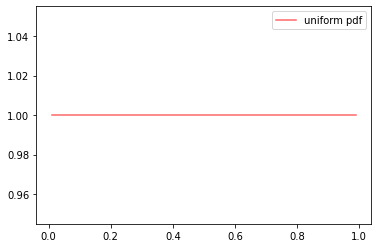

In [86]:
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
sns.lineplot(x=x, y=stats.uniform(loc=0, scale=1).pdf(x), color='red', alpha=0.6, label='uniform pdf') # locationÍ≥º scale Ï°∞Ï†ïÌï¥ÏÑú Î∂ÑÌè¨ ÏÉùÏÑ± Í∞ÄÎä•
plt.show()

### (2) Normal
- loc = ÌèâÍ∑†, scale = ÌëúÏ§ÄÌé∏Ï∞®

In [87]:
### PDF
stats.norm.pdf(loc=4, scale=0.8, x=3) # ÌôïÎ•†Î≥ÄÏàò xÍ∞Ä 3ÏùºÎïåÏùò ÌôïÎ•†Í∞í

0.2283113567362774

In [88]:
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

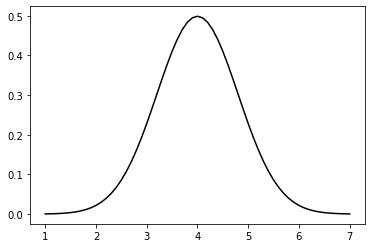

In [89]:
x_plot = np.arange(start=1, stop=7.1, step=0.1)
sns.lineplot(x=x_plot, y=stats.norm.pdf(x=x_plot, loc=4, scale=0.8), color = 'black')
plt.show()

In [90]:
### CDF
stats.norm.cdf(loc=4, scale=0.8, x=3)

0.10564977366685535

In [91]:
### PPF (Percent Point Function)
# ÎàÑÏ†ÅÌôïÎ•†Ïù¥ qÍ∞Ä ÎêòÎäî ÌôïÎ•†Î≥ÄÏàò Í∞í
stats.norm.ppf(loc=4, scale=0.8, q=0.025)

2.4320288123679563

In [92]:
sitagawa = stats.norm.cdf(loc=4, scale=0.8, x=3)
stats.norm.ppf(loc=4, scale=0.8, q=sitagawa)

3.0000000000000004

In [93]:
# qÍ∞Ä 0.5Ïù∏ ÏßÄÏ†ê = ÌèâÍ∑†
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

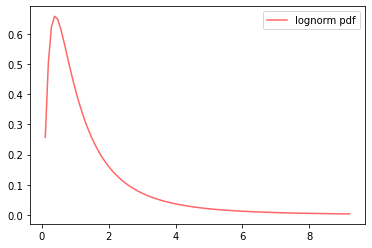

In [94]:
### (Ï∞∏Í≥†) Log-normal distribution
# Î°úÍ∑∏Î•º Ï∑®Ìïú Î≥ÄÏàòÍ∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Îäî Í≤ΩÏö∞
# ln(X) ~ N(mu, sigma)
s = 0.954 # shape parameter
x = np.linspace(stats.lognorm.ppf(0.01, s), stats.lognorm.ppf(0.99, s), 100)
sns.lineplot(x=x, y=stats.lognorm.pdf(x, s), color='red', alpha=0.6, label='lognorm pdf')
plt.show()

### (3) Student T
- ÌèâÍ∑† Í≤ÄÏ†ïÏùÑ ÏúÑÌï¥ ÎßåÎì§Ïñ¥ÏßÑ Î∂ÑÌè¨
- ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú, Î™®Î∂ÑÏÇ∞ simga**2Í∞Ä Chi-sq(n)ÏúºÎ°ú Ï∂îÏ†ïÎêú Í≤ΩÏö∞
- ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Î≥¥Îã§ Íº¨Î¶¨Í∞Ä Îçî ÎëêÍ∫ºÏö¥ ÌòïÌÉú
- ÌèâÍ∑† 0, Î∂ÑÏÇ∞ n/(n-2), n > 2

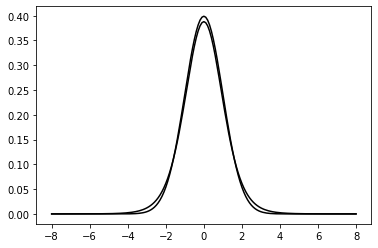

In [95]:
# ÌèâÍ∑† 0, Î∂ÑÏÇ∞ n/(n-2)
# nÏù¥ Ïª§ÏßÄÎ©¥ ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∑ºÏÇ¨
x = np.arange(start=-8, stop=8.1, step=0.1)
sns.lineplot(x=x, y=stats.norm.pdf(x=x), color='black', linestyle='dotted')
sns.lineplot(x=x, y=stats.t.pdf(x=x, df=9), color='black')

### (4) Chi-square
- kÍ∞úÏùò ÏÑúÎ°ú ÎèÖÎ¶ΩÏ†ÅÏù∏ ÌëúÏ§ÄÏ†ïÍ∑ú ÌôïÎ•†Î≥ÄÏàòÎ•º Í∞ÅÍ∞Å Ï†úÍ≥±Ìïú Îã§Ïùå Ìï©Ìï¥ÏÑú ÏñªÏñ¥ÏßÄÎäî Î∂ÑÌè¨
- Gamma Î∂ÑÌè¨Ïùò ÌäπÏàòÌïú ÌòïÌÉú
- Chi-sq ~ Gamma(n/2, 2), nÏùÄ ÏûêÏú†ÎèÑ
- ÌèâÍ∑† n, Î∂ÑÏÇ∞ 2n

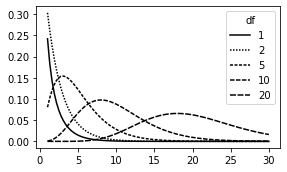

In [96]:
x = [1 + i * (30 - 1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x': x,
    'chi_1': stats.chi2.pdf(x, df=1),
    'chi_2': stats.chi2.pdf(x, df=2),
    'chi_5': stats.chi2.pdf(x, df=5),
    'chi_10': stats.chi2.pdf(x, df=10),
    'chi_20': stats.chi2.pdf(x, df=20),
})
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(chi.x, chi.chi_1, color='black', linestyle='-', label='1')
ax.plot(chi.x, chi.chi_2, color='black', linestyle=(0, (1, 1)), label='2')
ax.plot(chi.x, chi.chi_5, color='black', linestyle=(0, (2, 1)), label='5')
ax.plot(chi.x, chi.chi_10, color='black', linestyle=(0, (3, 1)), label='10')
ax.plot(chi.x, chi.chi_20, color='black', linestyle=(0, (4, 1)), label='20')
ax.legend(title='df')

plt.tight_layout()
plt.show()

### (5) F
- Îëê Í∞úÏùò Ïπ¥Ïù¥Ï†úÍ≥± Î≥ÄÏàòÏùò ÎπÑÎ°ú ÌëúÌòÑÎêòÎäî Î∂ÑÌè¨
- Fisher-Snedecor Distribution
- ÌèâÍ∑† n/(n-2), Î∂ÑÏÇ∞ 2*(n**2)*(m+n-2)/m*((n-2)**2)(n-4), n > 4

In [97]:
stats.f.pdf(sorted(x), dfn=1, dfd=10)

array([2.30361989e-01, 1.75326213e-01, 1.37509636e-01, 1.10124770e-01,
       8.95846844e-02, 7.37825167e-02, 6.13877908e-02, 5.15150896e-02,
       4.35514142e-02, 3.70590924e-02, 3.17178318e-02, 2.72884591e-02,
       2.35893389e-02, 2.04805419e-02, 1.78529302e-02, 1.56204596e-02,
       1.37146444e-02, 1.20805099e-02, 1.06735892e-02, 9.45766471e-03,
       8.40305134e-03, 7.48527663e-03, 6.68405716e-03, 5.98249794e-03,
       5.36646102e-03, 4.82406438e-03, 4.34528130e-03, 3.92161829e-03,
       3.54585461e-03, 3.21183059e-03, 2.91427459e-03, 2.64866111e-03,
       2.41109373e-03, 2.19820826e-03, 2.00709224e-03, 1.83521781e-03,
       1.68038554e-03, 1.54067721e-03, 1.41441605e-03, 1.30013318e-03,
       1.19653908e-03, 1.10249941e-03, 1.01701439e-03, 9.39201148e-04,
       8.68278623e-04, 8.03554613e-04, 7.44414601e-04, 6.90312134e-04,
       6.40760499e-04, 5.95325512e-04, 5.53619262e-04, 5.15294670e-04,
       4.80040738e-04, 4.47578418e-04, 4.17656983e-04, 3.90050860e-04,
      

### (6) Exponential
- Ìïú ÏÇ¨Í±¥Ïù¥ ÏùºÏñ¥ÎÇ†ÎïåÍπåÏßÄÏùò ÏãúÍ∞ÑÏù¥ÎÇò Í±∞Î¶¨Ïóê ÎåÄÌïú Î∂ÑÌè¨
- Î¨¥Í∏∞ÏñµÏÑ±: ÌòÑÏû¨ÍπåÏßÄ ÏÜåÏöîÎêú ÏãúÍ∞ÑÏù¥ ÏÇ¨Í±¥ Î∞úÏÉù ÌôïÎ•†Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÏùå
- ÌèâÍ∑† 1/Œª, Î∂ÑÏÇ∞ 1/Œª**2

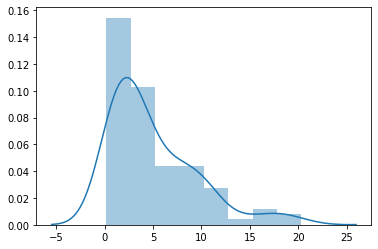

In [98]:
sample = stats.expon.rvs(scale=5, size=100) # Ï£ºÍ∏∞Î≥Ñ ÌèâÍ∑† ÏÇ¨Í±¥ Ïàò 5
sns.distplot(sample)
plt.show()

### (7)  Weibull
- ÏÇ¨Í±¥ Î∞úÏÉùÎ•†Ïù¥ ÏãúÍ∞ÑÏóê Îî∞Îùº Î≥ÄÌôî
    - beta > 1Ïù¥Î©¥ Î∞úÏÉùÎ•†Ïù¥ ÏãúÍ∞ÑÏù¥ ÏßÄÎÇ®Ïóê Îî∞Îùº Ï¶ùÍ∞Ä, ÏûëÏúºÎ©¥ Í∞êÏÜå
- ÏßÄÏàòÎ∂ÑÌè¨Ïùò ÏùºÎ∞òÌôî Î≤ÑÏ†Ñ

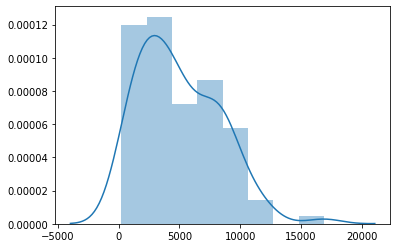

In [99]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100) # beta 1.5
sns.distplot(sample)
plt.show()

### (8) Gamma
- shape (alpha), scale (beta)
- ÏßÄÏàò Î∂ÑÌè¨ÎÇò Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨ Îì±Ïùò Îß§Í∞úÎ≥ÄÏàòÏóê ÎåÄÌïú Ïº§Î†à ÏÇ¨Ï†Ñ ÌôïÎ•† Î∂ÑÌè¨Ïù¥Î©∞, Ïù¥Ïóê Îî∞Îùº Î≤†Ïù¥Ï¶à ÌôïÎ•†Î°†ÏóêÏÑú ÏÇ¨Ï†Ñ ÌôïÎ•† Î∂ÑÌè¨Î°ú ÏÇ¨Ïö©
- ÌèâÍ∑† alpha*beta, Î∂ÑÏÇ∞ alpha*(beta**2)
- ÏÇ¨Í±¥Ïù¥ kÎ≤à Î∞úÏÉùÌï† ÎïåÍπåÏßÄÏùò ÏãúÍ∞Ñ ~ Gamma(k, 1/lambda). lambdaÎäî Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨Ïùò ÌååÎùºÎØ∏ÌÑ∞
    - ÏßÄÏàòÎ∂ÑÌè¨Îäî Gamma(1, 1/lambda)ÏôÄ ÎèôÏùº

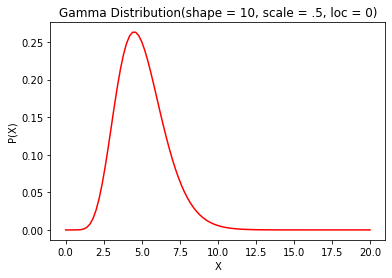

In [100]:
x = np.linspace(0, 20, 101)
y = stats.gamma(10, 0, 0.5).pdf(x)        

sns.lineplot(x=x, y=y, color='red')        
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Gamma Distribution(shape = 10, scale = .5, loc = 0)') 
plt.show()

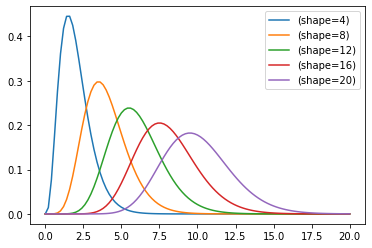

In [101]:
for shape in np.arange(4, 24, 4):
    sns.lineplot(x=x, y=stats.gamma(shape, 0, 0.5).pdf(x), label='(shape=' + str(shape) + ')')

plt.legend()
plt.show()

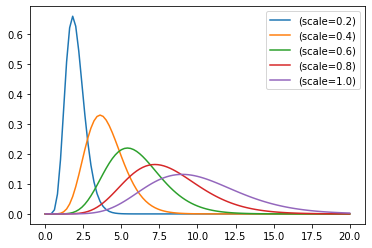

In [102]:
for scale in np.arange(2, 12, 2) / 10:
    sns.lineplot(x=x, y=stats.gamma(10, 0, scale).pdf(x), label='(scale=' + str(scale) + ')')

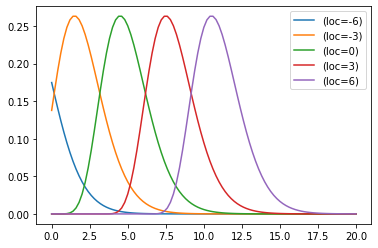

In [103]:
for loc in np.arange(5) * 3 - 6:
    sns.lineplot(x=x, y=stats.gamma(10, loc, 0.5).pdf(x), label='(loc=' + str(loc) + ')')
plt.legend()
plt.show()

### (9) Beta
- Îëê Í∞úÏùò Í∞êÎßàÎ∂ÑÌè¨Ïùò Ï°∞Ìï©ÏúºÎ°ú ÎßåÎì§Ïñ¥ÏßÄÎäî ÌååÏÉùÎ∂ÑÌè¨
- Beta ~ Gamma(alpha + beta, 1)
- 0Î∂ÄÌÑ∞ 1ÍπåÏßÄÏùò Í∞íÏùÑ Í∞ÄÏßà Ïàò ÏûàÎäî Î≤†Î•¥ÎàÑÏù¥ÏãúÌñâ Î™®Ïàò ùúáÏùò Í∞íÏùÑ Î≤†Ïù¥ÏßÄÏïà Ï∂îÏ†ïÌïú Í≤∞Í≥ºÎ•º ÌëúÌòÑÌïú Í≤É
- ÏÇ¨Ï†ÑÏ†ïÎ≥¥Í∞Ä ÏóÜÎäî Î≤†Ïù¥Ï¶à ÌÜµÍ≥ÑÏóêÏÑú ÏÇ¨Ï†ÑÌôïÎ•†Î°ú ÎßéÏù¥ Ïì∞ÏûÑ

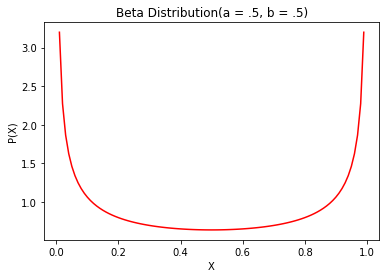

In [104]:
x = np.linspace(.01, .99, 99)
a = .5
b = .5
y1 = stats.beta(a, b).pdf(x)        

sns.lineplot(x=x, y=y1, color='red')        
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('Beta Distribution(a = .5, b = .5)') 
plt.show()

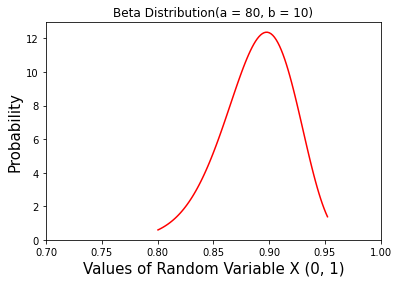

In [105]:
# Set the shape paremeters
a, b = 80, 10

# Generate the value between
x = np.linspace(stats.beta.ppf(0.01, a, b), stats.beta.ppf(0.99, a, b), 100)

# Plot the beta distribution
plt.xlim(0.7, 1)
sns.lineplot(x=x, y=stats.beta.pdf(x, a, b), color='red')
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.title('Beta Distribution(a = 80, b = 10)') 
plt.show()

### (10) Dirichlet
- Î≤†ÌÉÄ Î∂ÑÌè¨Ïùò Îã§Î≥ÄÏàò ÌôïÏû•
- Î≤†Ïù¥Ï¶à ÌÜµÍ≥ÑÌïôÏóêÏÑú Îã§Ìï≠ Î∂ÑÌè¨Ïóê ÎåÄÌïú ÏÇ¨Ï†Ñ Ïº§Î†àÌôïÎ•†Î∂ÑÌè¨ 

In [106]:
quantiles = np.array([0.2, 0.2, 0.6])  # specify quantiles
alpha = np.array([0.4, 5, 15])  # specify concentration parameters

stats.dirichlet.pdf(quantiles, alpha)

0.2843831684937255

In [107]:
### log scale
stats.dirichlet.logpdf(quantiles, alpha)

-1.2574327653159187

In [108]:
stats.dirichlet.rvs(alpha, size=2, random_state=2)

array([[0.01639427, 0.1292273 , 0.85437844],
       [0.00156917, 0.19033695, 0.80809388]])